### Exploratory Analysis of the Users

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

np.random.seed(42)
sns.set_style('ticks')
sns.set_palette('colorblind')

In [7]:
users = pd.read_csv('../data/users.csv')
users.head()

,user_id,user_created,consent,art_knowledge,museum_visits,view_collections,physical_visits,condition,order,age,gender,education,work,disability,distraction_task_timestamp
0,6737f57f-8646-4c03-9546-8da5a719d226,2022-07-22 08:11:57.353360,1,some,once a month,once a week,once a year,concatenated,model,30-39,male,masters,student,not disabled,2022-07-22 08:17:36.814110
1,86b266c0-920c-4e83-802d-0083a06f3f1d,2022-07-22 12:20:43.225033,1,knowledgeable,most days,most days,once a year,image,model,21-29,female,high-school,employed,disabled,2022-07-22 12:22:35.825468
2,62b14681-8d4a-44b5-a201-942bba9b4bd8,2022-07-22 13:45:02.013320,1,novice,once a year,first time,two or three years,image,model,30-39,male,masters,employed,not disabled,2022-07-22 14:02:10.897984
3,09cf0e31-cf99-47f3-906f-8da336f23f73,2022-07-22 13:45:43.294777,1,novice,once a year,once a year,two or three years,meta,model,30-39,nonbinary,bachelors,employed,not disabled,2022-07-22 14:01:25.902276
4,27405dfe-adee-47e8-b002-818e61c5c552,2022-07-22 14:36:52.999452,1,some,first time,once a year,once a year,image,model,21-29,male,masters,student,not disabled,2022-07-22 15:00:39.816547


In [8]:
# useful mappings
demographic_mappings = {
    'age': ['18-20', '21-29', '30-39', '40-49', '50-59', '60+'],
    'gender': ['Male', 'Female', 'Non-binary', 'Prefer not to say'],
    'gender_order': ['male', 'female', 'nonbinary', 'none'],
    'education': ['High School', 'College', 'Bachelors', 'Masters', 'PhD'],
    'education_order': ['high-school', 'college', 'bachelors', 'masters', 'phd'],
    'work': ['Student', 'Employred', 'Unemployed', 'Retired'],
    'work_order': ['student', 'employed', 'unemployed', 'retired'],
    'disability': ['No Disability', 'Disabled', 'No Answer'],
    'disability_order': ['not disabled', 'disabled', 'no answer']
}

domain_knowledge_mappings = {
    'art_knowledge': ['Novice', 'Some knowledge', 'Knowledgeable', 'Expert'],
    'art_knowledge_order': ['novice', 'some', 'knowledgeable', 'expert'],
    'museum_visits': ['Most Days', 'At least once a week', 'At least once a month', 'Every two to three months', 'Once a year', 'First time'],
    'museum_visits_order': ['most days', 'once a week', 'once a month', 'every two to three months', 'once a year', 'first time'],
    'view_collections': ['Most Days', 'At least once a week', 'At least once a month', 'Every two to three months', 'Once a year', 'First time'],
    'view_collections_order': ['most days', 'once a week', 'once a month', 'every two to three months', 'once a year', 'first time'],
    'physical_visits': ['Every six months', 'Once a year', 'Every two or three years', 'Every four or five years', 'Six years or longer', 'Never'],
    'physical_visits_order': ['once every 6 months', 'once a year', 'two or three years', 'four or five years', 'six years or longer', 'never'],
    'art_knowledge_title': 'Art Knowledge',
    'museum_visits_title': 'Museum Visits',
    'view_collections_title': 'View Collections',
    'physical_visits_title': 'Physical Visits'
}

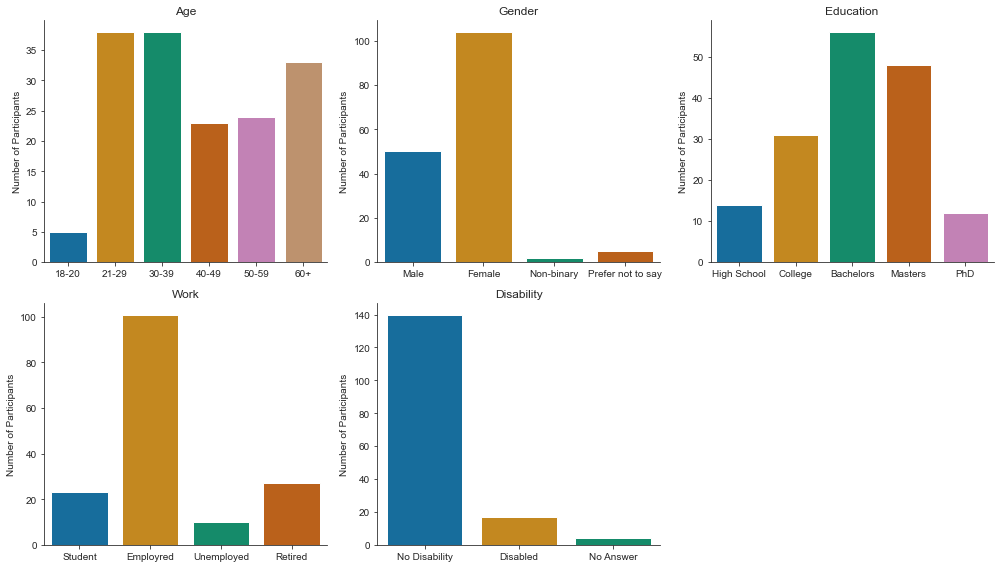

In [9]:
# Get some basic statistics on the demographics
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8))
fig.delaxes(axes[1][2])
axes = axes.ravel()

for ax, demo in zip(axes, ['age', 'gender', 'education', 'work', 'disability']):
    if demo == 'age':
        d_order = demographic_mappings[demo]
    else:
        d_order = demographic_mappings[demo + '_order']

    p = sns.countplot(
        x = demo, 
        data = users, 
        ax = ax,
        order = d_order
    )
    p.set(
        title = demo.capitalize(),
        xlabel = '',
        xticklabels = demographic_mappings[demo],
        ylabel = 'Number of Participants'
    )

sns.despine()
plt.tight_layout()
plt.show()

In [10]:
users.columns

Index(['user_id', 'user_created', 'consent', 'art_knowledge', 'museum_visits',
       'view_collections', 'physical_visits', 'condition', 'order', 'age',
       'gender', 'education', 'work', 'disability',
       'distraction_task_timestamp'],
      dtype='object')

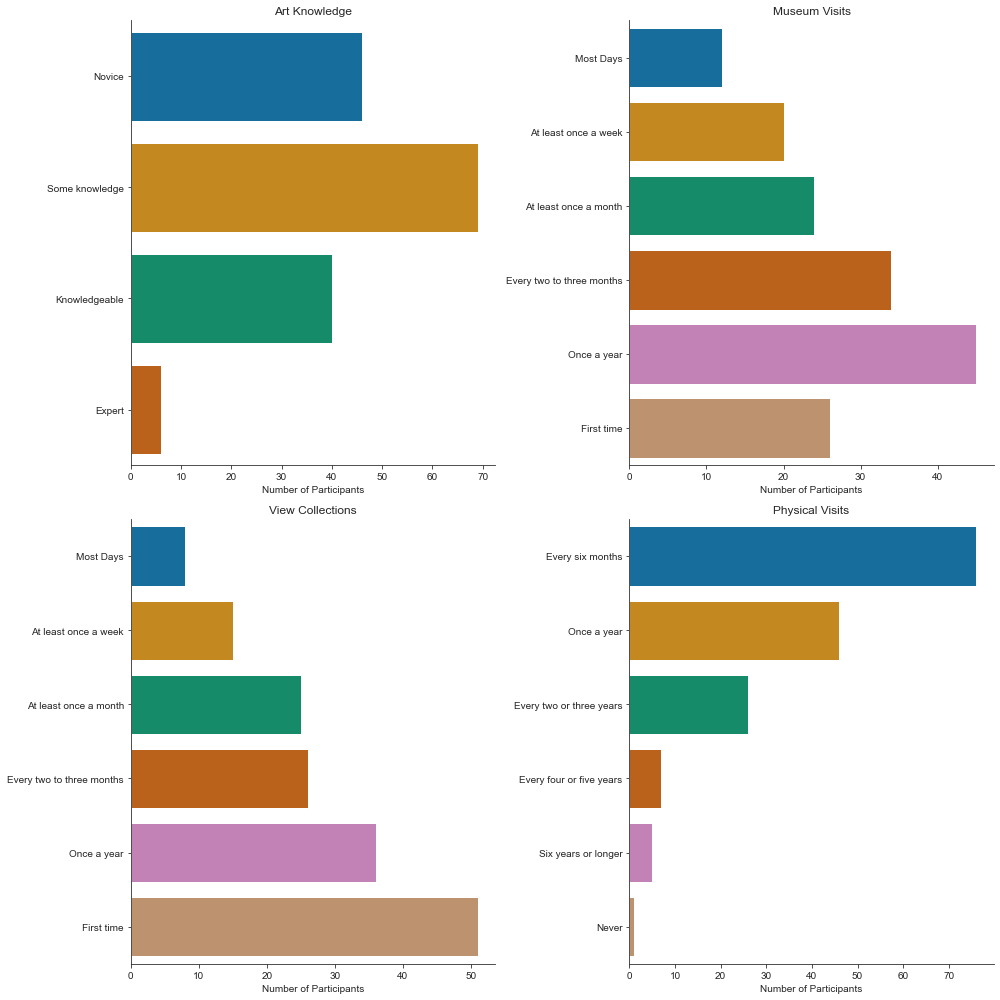

In [18]:
# Visualise statistics on museum visits
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 14))
axes = axes.ravel()

for ax, demo in zip(axes, ['art_knowledge', 'museum_visits', 'view_collections', 'physical_visits']):
    d_order = domain_knowledge_mappings[demo + '_order']

    p = sns.countplot(
        y = demo, 
        data = users, 
        ax = ax, 
        orient='h',
        order = d_order
    )
    p.set(
        ylabel = '',
        xlabel = 'Number of Participants',
        title = domain_knowledge_mappings[demo + '_title'],
        yticklabels = domain_knowledge_mappings[demo]
    )   

sns.despine()
plt.tight_layout()
#plt.show()
plt.savefig('../plots/users/domain_knowledge.png', dpi = 300)

In [ ]:
users['art_knowledge'].value_counts()

some             69
novice           46
knowledgeable    40
expert            6
Name: art_knowledge, dtype: int64

In [ ]:
users['museum_visits'].value_counts()

once a year                  45
every two to three months    34
first time                   26
once a month                 24
once a week                  20
most days                    12
Name: museum_visits, dtype: int64

In [ ]:
users['view_collections'].value_counts()

first time                   51
once a year                  36
every two to three months    26
once a month                 25
once a week                  15
most days                     8
Name: view_collections, dtype: int64

In [ ]:
users['physical_visits'].value_counts()

once every 6 months    76
once a year            46
two or three years     26
four or five years      7
six years or longer     5
never                   1
Name: physical_visits, dtype: int64

In [ ]:
users['condition'].value_counts()

concatenated    57
image           55
meta            49
Name: condition, dtype: int64

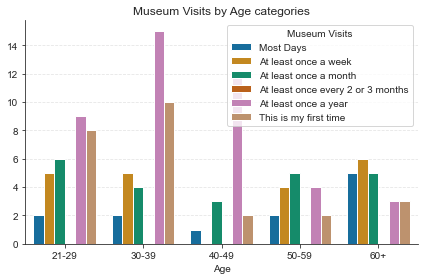

In [ ]:
hue_order = ['most days', 'once a week', 'once a month', 'every two or three months', 'once a year', 'first time']
data_order = ['21-29', '30-39', '40-49', '50-59', '60+']

p = sns.countplot(
    x = 'age', hue = 'museum_visits', 
    data = users, 
    hue_order = hue_order, order = data_order,
    palette = sns.color_palette('colorblind')
)

p.set(
    xlabel = 'Age',
    ylabel = '',
    # yticks = [0, 1, 2, 3, 4],
    title = 'Museum Visits by Age categories'
)
p.yaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
plt.legend(
    title = 'Museum Visits', 
    loc = 'upper right', 
    labels = [
        'Most Days', 'At least once a week', 'At least once a month', 
        'At least once every 2 or 3 months', 'At least once a year', 
        'This is my first time'
    ])

sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
users.columns

Index(['user_id', 'user_created', 'consent', 'art_knowledge', 'museum_visits',
       'view_collections', 'physical_visits', 'condition', 'order', 'age',
       'gender', 'education', 'work', 'disability',
       'distraction_task_timestamp'],
      dtype='object')